<a href="https://colab.research.google.com/github/silveiraluiza/machine-learning/blob/main/Glass_Dataset_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import svm
from sklearn.model_selection import train_test_split

drive.mount('/content/gdrive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


### Importando e explorando os dados

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/data/datasets_glass.csv', sep=',')

# Visualização dos dados 
print(data.shape)
data.head(10)

(214, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


Iremos plotar abaixo a distribuição das classes em histograma

(array([70., 76., 17.,  0., 13.,  9., 29.]),
 array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
        5.28571429, 6.14285714, 7.        ]),
 <a list of 7 Patch objects>)

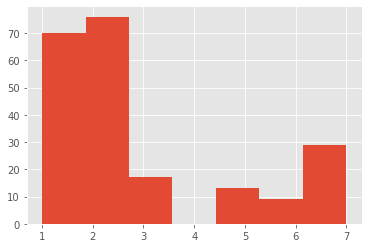

In [ ]:
plt.style.use('ggplot')
plt.hist(data["Type"], bins=7)

Pela descrição do dataset, o tipo de vidro é de 1 a 7, porém não existem dados para o tipo 4


In [ ]:
data.describe() 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Pelas informações do dataset vemos que não existe nenhum dado nulo na base, portanto não precisamos realizar tratamento de nulos

Iremos plotar os gráficos dos pares de variáveis e da sua distribuição individual

<Figure size 576x576 with 0 Axes>

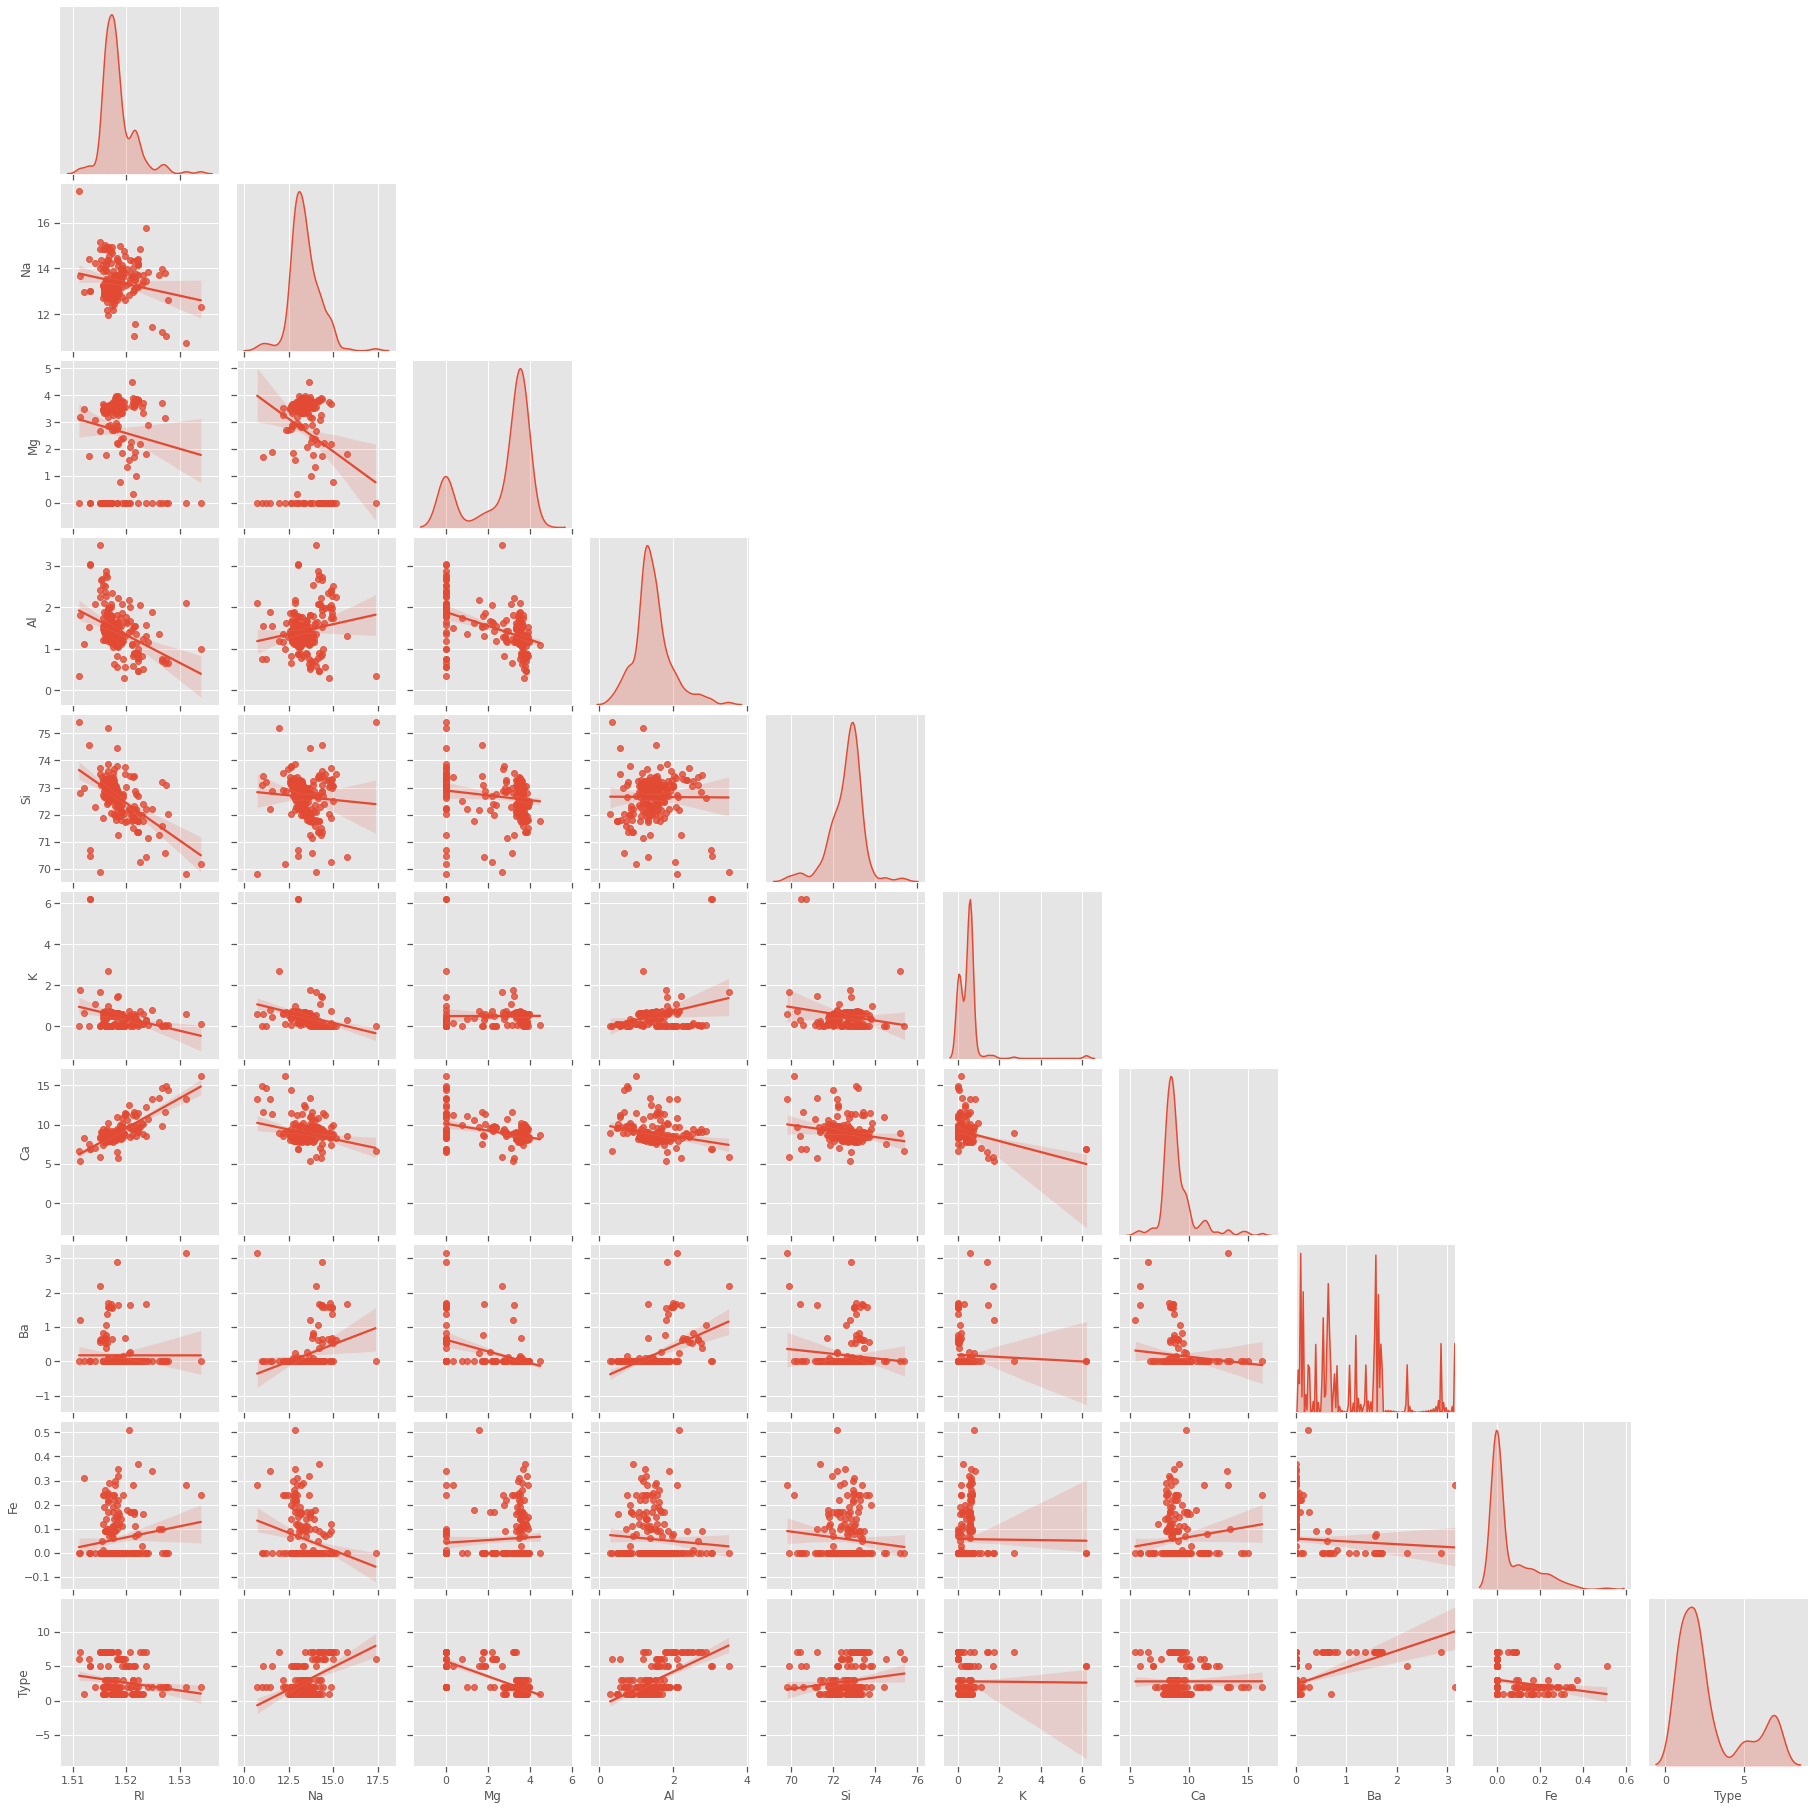

In [ ]:
variaveis_pertinentes = data
sns.set(style="ticks", color_codes=True)
plt.style.use('ggplot')
# Plotando a distribuição em pares das variáveis pertinentes e seus histogramas
plt.figure(figsize=(8,8))
sns.pairplot(variaveis_pertinentes,palette='coolwarm', corner=True, kind="reg", diag_kind="kde")
plt.show()


Analisando os gráficos as únicas variáveis que parecem ter correlação visivel uma com a outra são a RI e a Ca. Também é possível concluir que a distribuição de todas as variáveis segue um padrão de ter picos em poucos valores e ocorrência baixa em todos os outros, menos a variável Ba, que possui vários picos e vales.

### Matriz de correlação

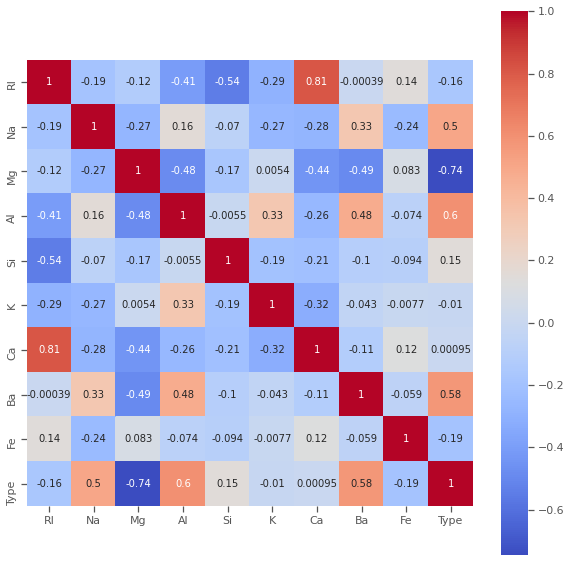

            RI        Na        Mg  ...        Ba        Fe      Type
RI    1.000000 -0.191885 -0.122274  ... -0.000386  0.143010 -0.164237
Na   -0.191885  1.000000 -0.273732  ...  0.326603 -0.241346  0.502898
Mg   -0.122274 -0.273732  1.000000  ... -0.492262  0.083060 -0.744993
Al   -0.407326  0.156794 -0.481799  ...  0.479404 -0.074402  0.598829
Si   -0.542052 -0.069809 -0.165927  ... -0.102151 -0.094201  0.151565
K    -0.289833 -0.266087  0.005396  ... -0.042618 -0.007719 -0.010054
Ca    0.810403 -0.275442 -0.443750  ... -0.112841  0.124968  0.000952
Ba   -0.000386  0.326603 -0.492262  ...  1.000000 -0.058692  0.575161
Fe    0.143010 -0.241346  0.083060  ... -0.058692  1.000000 -0.188278
Type -0.164237  0.502898 -0.744993  ...  0.575161 -0.188278  1.000000

[10 rows x 10 columns]


In [ ]:
# Visualizando a matriz de correlação
corr = variaveis_pertinentes.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, xticklabels= corr.columns.values, yticklabels= corr.columns.values, cmap= 'coolwarm')
plt.show()

print(corr) # Verificando a correlão entre as variáveis

Plotando a matriz de correlação confirmamos que a única correlação forte é a de Ca com RI, porém também visualizamos uma correlação média-forte entre Mg e Type.

In [ ]:
corr_min = abs(corr).values.min()
np.where(abs(corr)==corr_min)

(array([0, 7]), array([7, 0]))

In [ ]:
variaveis_pertinentes.columns[[0,7]]

Index(['RI', 'Ba'], dtype='object')

As duas variáveis com menor correlação são RI e Ba, seguidos de Ca e Type, elas são as que mais se aproximam de zero.

### Dividindo o dataset em X e y (data e target)

In [ ]:
y = data[["Type"]]
X = data.drop(['Type',],1)
print(data.shape, X.shape, y.shape)

(214, 10) (214, 9) (214, 1)


### Modelo SVM


Definir uma função que avaliar o modelo SVM com kernel variando como candidato, usando validação cruzada estratificada repetida de 5 vezes e, em seguida, retornar uma lista de pontuações calculadas no modelo para cada dobra e repetição.

In [ ]:
# baseline model and test harness for the glass identification dataset

# Avaliar o modelo
def evaluate_model(X, y, model):
	# Utilizar o RepeatedStratified k-fold 5x10
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
	# Avaliando o modelo
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

Definimos uma função get_models() que recebe 4 tipos de kernels diferentes para SVM e os retorna com alguns parâmetros pré-definidos.

In [ ]:
# Definindo a priori, qual o modelo de referencia
# define models to test
def get_models():
  C = 1.0  # SVM regularization parameter
  models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=5, gamma='auto', C=C))
  names = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 5) kernel')
  return models, names

Podemos então avaliar o modelo chamando a função evaluate_model() em seguida salvar os scores na lista results que relata a média e o desvio padrão dos resultados.

In [ ]:
# Definindo modelos
models, names = get_models()
results = list()
# Avaliando cada modelo
for i in range(len(models)):
	# Avaliando o modelo e armazenando os resultados
	scores = evaluate_model(X, y, models[i])
	results.append(scores)
	# Resumo das performances
	print('>%s média: %.3f ( desvio padrão: %.3f)' %(names[i], np.mean(scores), np.std(scores)))

>SVC with linear kernel média: 0.637 ( desvio padrão: 0.059)
>LinearSVC (linear kernel) média: 0.526 ( desvio padrão: 0.078)
>SVC with RBF kernel média: 0.700 ( desvio padrão: 0.059)
>SVC with polynomial (degree 5) kernel média: 0.663 ( desvio padrão: 0.060)


### Dividindo o conjunto de dados em treinamento e teste e realizando o Repeated K-Fold com 5x10

In [ ]:
from sklearn.metrics import accuracy_score

y = data[["Type"]].values
X = data.drop(['Type',],1).values

svckernellinear = []
linearsvc = []
svcrbf = []
poly = []

svckernellinear_train = []
linearsvc_train = []
svcrbf_train = []
poly_train = []

# Usando os mesmos modelos
models, names = get_models()

skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=2673512)
for train_index, test_index in skf.split(X, y):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  index = 0
  names = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 5) kernel']
  for mod in models:
    nm = names[index]
    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    class_report = accuracy_score(y_test, y_pred) 

    y_pred1 = mod.predict(X_train)
    class_report1 = accuracy_score(y_train, y_pred1) 

    if nm == 'SVC with linear kernel':
      svckernellinear.append(class_report)
      svckernellinear_train.append(class_report1)
    elif nm == 'LinearSVC (linear kernel)':
      linearsvc.append(class_report)
      linearsvc_train.append(class_report1)
    elif nm == 'SVC with RBF kernel':
      svcrbf.append(class_report) 
      svcrbf_train.append(class_report1) 
    else:
      poly.append(class_report)
      poly_train.append(class_report1)

    index = index +1

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/p

## Avaliando a acurácia dos modelos

In [ ]:
# Modelo com melhor acurácia do SVC with linear kernel
print("SVC with linear kernel")
print("---- Conjunto teste ----")
print("Melhor acurácia: {}".format(max(svckernellinear)))
print("Média da acurácia: {}".format(np.mean(svckernellinear)))

print("---- Conjunto treino ----")
print("Melhor acurácia: {}".format(max(svckernellinear_train)))
print("Média da acurácia: {}".format(np.mean(svckernellinear_train)))


SVC with linear kernel
---- Conjunto teste ----
Melhor acurácia: 0.7906976744186046
Média da acurácia: 0.6248394241417498
---- Conjunto treino ----
Melhor acurácia: 0.7325581395348837
Média da acurácia: 0.6901835985312117


In [ ]:
# Modelo com melhor acurácia do LinearSVC (linear kernel)
print("LinearSVC (linear kernel)")
print("---- Conjunto teste ----")
print("Melhor acurácia: {}".format(max(linearsvc)))
print("Média da acurácia: {}".format(np.mean(linearsvc)))

print("---- Conjunto treino ----")
print("Melhor acurácia: {}".format(max(linearsvc_train)))
print("Média da acurácia: {}".format(np.mean(linearsvc_train)))

LinearSVC (linear kernel)
---- Conjunto teste ----
Melhor acurácia: 0.6744186046511628
Média da acurácia: 0.5401550387596898
---- Conjunto treino ----
Melhor acurácia: 0.6900584795321637
Média da acurácia: 0.5824445804433566


In [ ]:
# Modelo com melhor acurácia do SVC with RBF kernel

print("SVC with RBF kernel")
print("---- Conjunto teste ----")
print("Melhor acurácia: {}".format(max(svcrbf)))
print("Média da acurácia: {}".format(np.mean(svcrbf)))

print("---- Conjunto treino ----")
print("Melhor acurácia: {}".format(max(svcrbf_train)))
print("Média da acurácia: {}".format(np.mean(svcrbf_train)))

SVC with RBF kernel
---- Conjunto teste ----
Melhor acurácia: 0.7906976744186046
Média da acurácia: 0.6930232558139535
---- Conjunto treino ----
Melhor acurácia: 0.8304093567251462
Média da acurácia: 0.8071256629946961


In [ ]:
# Modelo com melhor acurácia do SVC with polynomial (degree 5) kernel

print("SVC with polynomial (degree 5) kernel")
print("---- Conjunto teste ----")
print("Melhor acurácia: {}".format(max(poly)))
print("Média da acurácia: {}".format(np.mean(poly)))

print("---- Conjunto treino ----")
print("Melhor acurácia: {}".format(max(poly_train)))
print("Média da acurácia: {}".format(np.mean(poly_train)))

SVC with polynomial (degree 5) kernel
---- Conjunto teste ----
Melhor acurácia: 0.813953488372093
Média da acurácia: 0.6621594684385381
---- Conjunto treino ----
Melhor acurácia: 0.8596491228070176
Média da acurácia: 0.8115517475860194
